## Install the necessary python libraries

In [14]:
!pip install networkx pandas numpy matplotlib grakel

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from grakel.utils import graph_from_networkx
from grakel import GraphKernel

## Graph comparison

In [17]:
G1 = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3)])
G2 = nx.Graph([(0, 1), (1, 2), (1, 3)])

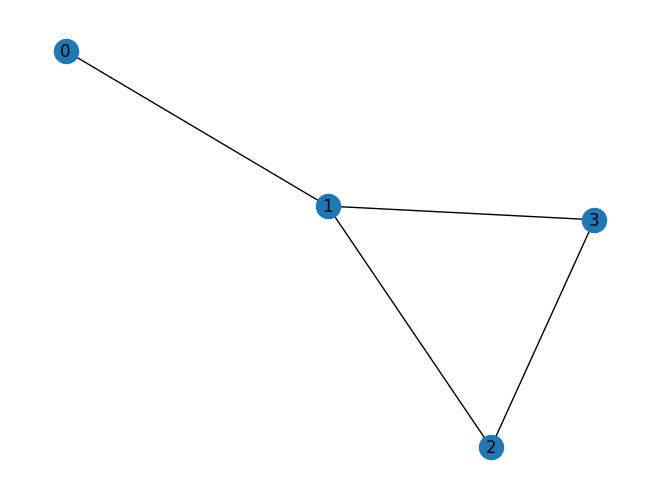

In [18]:
nx.draw(G1, with_labels = True)

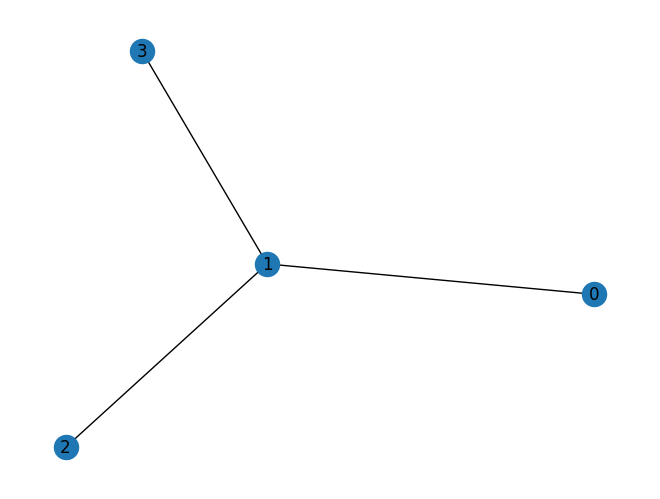

In [19]:
nx.draw(G2, with_labels = True)

In [20]:
R = nx.difference(G1, G2)

In [21]:
R.nodes

NodeView((0, 1, 2, 3))

In [22]:
R.edges

EdgeView([(2, 3)])

## Shortest path kernel

In [46]:
G1 = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (2, 4)])
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'}, 'label')

G2 = nx.Graph([(0, 1), (1, 2), (2, 3), (0, 3), (1, 4)])
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b', 3:'d', 4:'e'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "shortest_path"}], normalize=True)
# Return similarity scores among pairs of graphs in nx_graphs
similarity_arr = gk.fit_transform(graphs)

# Define index of 2 graphs in the array of similarity scores
G1_index = 0
G2_index = 1

print(f"Similarity between 2 graphs: {similarity_arr[G1_index][G2_index]}")

Similarity between 2 graphs: 0.38138503569823695


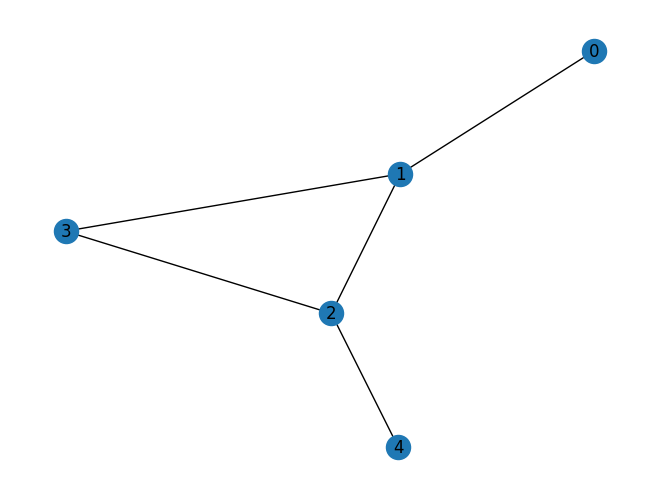

In [47]:
nx.draw(G1, with_labels = True)

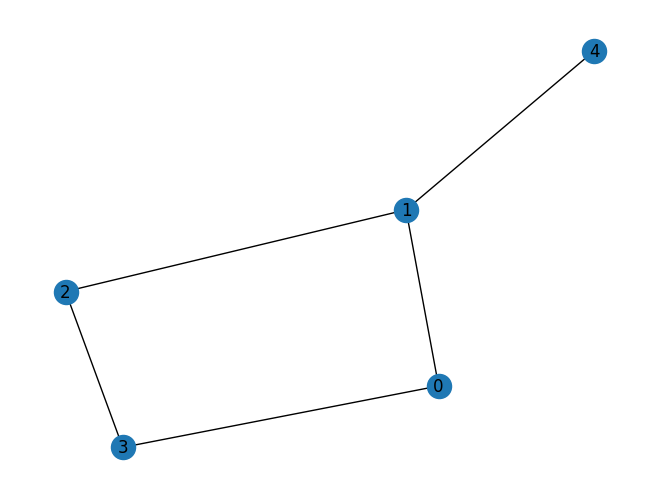

In [48]:
nx.draw(G2, with_labels = True)

## Random walk kernel

In [50]:
G1 = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (2, 4)])
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'}, 'label')

G2 = nx.Graph([(0, 1), (1, 2), (2, 3), (0, 3), (1, 4)])
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b', 3:'d', 4:'e'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "random_walk"}], normalize=True)
# Return similarity scores among pairs of graphs in nx_graphs
similarity_arr = gk.fit_transform(graphs)

# Define index of 2 graphs in the array of similarity scores
G1_index = 0
G2_index = 1

print(f"Similarity between 2 graphs: {similarity_arr[G1_index][G2_index]}")

Similarity between 2 graphs: 0.9966158911007547


## Weisfeiler Lehman (WL)

In [58]:
G1 = nx.Graph()
G1.add_edges_from(
    [
        ("red", "orange"),
        ("red", "yellow"),
        ("red", "green"),
        ("orange", "yellow"),
        ("yellow", "blue"),
        ("green", "blue"),
    ]
)

G2 = nx.Graph()
G2.add_edges_from(
    [
        ("yellow", "red"),
        ("yellow", "orange"),
        ("yellow", "blue"),
        ("red", "orange"),
        ("red", "green"),
        ("green", "blue"),
    ]
)

g1_hash = nx.weisfeiler_lehman_graph_hash(G1)
g2_hash = nx.weisfeiler_lehman_graph_hash(G2)

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: 8c44c442a25e00dfae4e1647b2faf79f
Second graph hash: 8c44c442a25e00dfae4e1647b2faf79f
Checking graph isomorphic: True


## SimRank similarity in bipartite graph

In [53]:
G = nx.Graph([('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'F')])

print(f"SimRank similarity between A and B: {nx.simrank_similarity(G, source='A', target='B')}")

print(f"SimRank similarity between C and D: {nx.simrank_similarity(G, source='C', target='D')}")

SimRank similarity between A and B: 0.7343004169068217
SimRank similarity between C and D: 0.7804009111226942


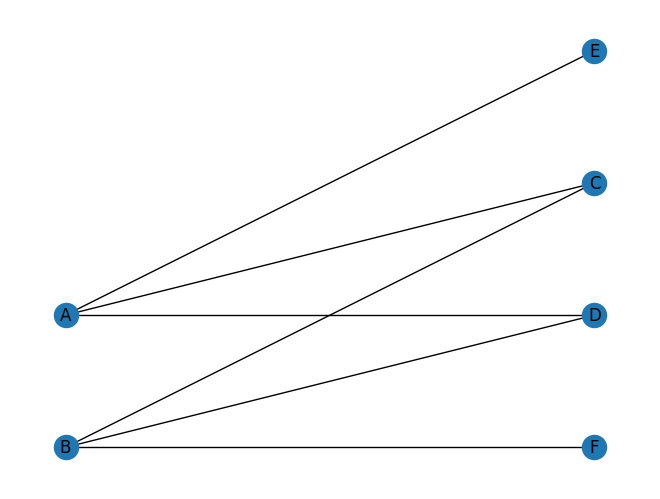

In [57]:
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update((n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)
plt.show()